In [1]:
import tweepy

consumer_key = 'XRtIm1Mnhk3ktpacwMzeGz1V0'
consumer_secret = 'kQoQpgLNsgGJ5VBPEqs3II92BvjeriXOdLWAVoeoY84t30TNgE'
access_token = '1633497956-vgq9BrDZmihmPPHexldU9oObEchUbhbChonPwYu'
access_token_secret = 'mFA16Mz93Iz4WTcoADchemO8lzPC4SB1fgaamWejkohVA'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#Comprobar que funciona la api
status = api.get_status('937349434668498944')
print(status.user.id)
user = api.get_user(status.user.id).screen_name
api.get_user('Humbert18960727').created_at

4219197432


datetime.datetime(2016, 1, 6, 16, 42, 23)

In [2]:
import time
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

def get_tweet_status(tweet_id):
    '''
    Devuelve un objeto status con todos los datos de un tweet
    '''
    return api.get_status(tweet_id)

def get_user_by_id(id):
    '''
    Devuelve un objeto user a traves del id del user
    '''
    return api.get_user(id)

def get_screen_name(id):
    try:
        user = get_user_by_id(id)
        screen_name = user.screen_name
        return screen_name
    except tweepy.TweepError as e:
        return ('SuspendedAccount')    
    
def get_screen_name_from_tweet(tweet_id):
    try:
        status = api.get_status(tweet_id)
        user = get_user_by_id(status.user.id)
        screen_name = user.screen_name
        return screen_name
    except tweepy.TweepError as e:
        return ('SuspendedAccount')    

def get_followers_page(screen_name):
    '''
    Devuelve los ids de los usuarios que sigue un user, screen_name es el nombre de usuario sin el '@'
    ej @NelsonMandela -> NelsonMandela
    '''
    ids = []
    for page in tweepy.Cursor(api.followers_ids, screen_name=screen_name).pages():
        ids.extend(page)
        #time.sleep(60)
    return ids



def get_followers_limited(screen_name, total):
    '''
    Devuelve los ids de los usuarios que sigue un user, screen_name es el nombre de usuario sin el '@'
    ej @NelsonMandela -> NelsonMandela
    Obtiene solo un numero de ids de usuarios indicado en el parametro total
    '''
    ids = []
    for page in tweepy.Cursor(api.followers_ids, screen_name=screen_name).items(total):
        ids.append(page)
    return ids

def get_followers_from_tweet_id(tweet_id, total = 0):
    '''
    Pasandole el id de un tweet obtenemos todos sus seguidores,
    se le puede pasar el parametro total y obtener solamente un numero concreto de ids
    '''
    user_id = get_tweet_status(tweet_id).user.id
    screen_name = get_user_by_id(user_id).screen_name
    if total == 0:
        followers_ids = get_followers_page(screen_name)
    else:
        followers_ids = get_followers_limited(screen_name,total)
    return followers_ids
    
    

def get_tweets(num_noticias):
    '''
    Le pasamos el numero de noticias de las cuales queremos obtener los tweets_ids
    Con el DataFrame de Pandas separamos los tweets de una misma noticia
    Devuelve un array de [titulos, array(tweets_ids)]
    '''
    df = pd.read_csv('./data/politifact_fake.csv') 
    #Esto se puede cambiar por otro dataset (ej: ./data/politifact_real.csv), pero de momento trabajamos con este
    df['tweet_ids'][0].split('\t')
    
    titulo = []
    tweets = []
    i = 0
    
    for tweet in df['tweet_ids']:
        if i < num_noticias:
            array_tweets = str(tweet).split('\t')
            #Se puede cambiar a que tenga al menos 5 o 10 tweets para probar
            if(len(array_tweets) > 1 and len(array_tweets) < 2000): #Solo si tiene algun tweet lo añadimos, 1 elemento es NaN
                tweets.append(array_tweets)
                titulo.append(df['title'][i])
                i = i+1
    noticias = [titulo, tweets]
    return noticias 

In [3]:
import numpy as np
#Ejemplos de prueba
print(get_screen_name_from_tweet('937349434668498944'))
print(get_tweet_status('937349434668498944').user.id)
print(get_user_by_id('4219197432').screen_name)
print(get_followers_limited('OfeliasHeaven',10))
#print(get_followers_from_tweet_id('937349434668498944')
noticias = get_tweets(10)
print("Noticia: ", noticias[0][0],"\nTweet: ",noticias[1][0][0]) #Primer tweet de la primera noticias

OfeliasHeaven
4219197432
OfeliasHeaven
[1208256837889482752, 1159961359, 551281483, 438051989, 730820197939093504, 404472897, 993614707222294528, 27443191, 16207074, 1172351964107038721]
Noticia:  BREAKING: First NFL Team Declares Bankruptcy Over Kneeling Thugs 
Tweet:  937349434668498944


94683
Num Maximo de Tweets: 1915 | Noticia Nº:  366
Nº Noticias en rangos de 200: [239.  51.  22.  22.   6.  18.   3.   3.   1.   2.]


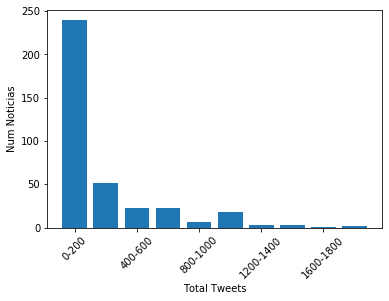

In [4]:
noticias = get_tweets(num_noticias=367)
total_tweets = 0
max_tweet = 0
number = 0
arrayPlot = np.zeros(10)
for i in range(len(noticias[1])):
    total_tweets = total_tweets + len(noticias[1][i])
    arrayPlot[len(noticias[1][i]) // 200] += 1
    if(max_tweet < len(noticias[1][i])):
        max_tweet = len(noticias[1][i])
        number = i                
print(total_tweets)
print("Num Maximo de Tweets:", max_tweet, "| Noticia Nº: ", i)
print("Nº Noticias en rangos de 200:",arrayPlot)

plt.bar(range(10),arrayPlot)
plt.xticks(range(0,10,2), ['0-200','400-600','800-1000','1200-1400','1600-1800'],rotation=45)
plt.ylabel("Num Noticias")
plt.xlabel("Total Tweets")
plt.show()

Vemos que la mayoria de noticias no supera los 200 twits, y que muy pocas noticias han tenido muchos twits

##### Intento de sacar aristas
(No es correcto)

In [5]:
df = pd.read_csv('./gen/nodos_1noticias.csv')
df = df[df.name != 'SuspendedAccount']
edgesDict = {}

for i, screen_name in enumerate(df['name']):
    followers = [1,2,3]
    #followers = get_followers_limited(screen_name,100)
    if i % 2 == 0:
        followers = ["A", 'b', 'd', '1']
    if i % 10 == 0:
        followers = ["A", 'b', 'd', '1', 'd', 'f','t', 'r', 'u']
    edgesDict[screen_name] = followers
    
edges = pd.DataFrame.from_dict(edgesDict,orient='index')
edges.rename( columns={'Unnamed: 0':'new column name'}, inplace=True )
print(edges.head())
edges.to_csv('./output/pruebas/prueba.csv')

edgesTest = pd.read_csv('./output/pruebas/prueba.csv')
edgesTest.rename( columns={'Unnamed: 0':'screen_name'}, inplace=True )
edgesTest.head(10)

                 0  1  2     3     4     5     6     7     8
OfeliasHeaven    A  b  d     1     d     f     t     r     u
lorn_cramer      1  2  3  None  None  None  None  None  None
lupash7          A  b  d     1  None  None  None  None  None
yojudenz         1  2  3  None  None  None  None  None  None
WilliamNerbonne  A  b  d     1  None  None  None  None  None


,screen_name,0,1,2,3,4,5,6,7,8
0,OfeliasHeaven,A,b,d,1.0,d,f,t,r,u
1,lorn_cramer,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
2,lupash7,A,b,d,1.0,NaN,NaN,NaN,NaN,NaN
3,yojudenz,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
4,WilliamNerbonne,A,b,d,1.0,NaN,NaN,NaN,NaN,NaN
5,saveusrepublic2,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
6,starchaser57,A,b,d,1.0,NaN,NaN,NaN,NaN,NaN
7,Ettan1945,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN
8,ThePipeStore,A,b,d,1.0,NaN,NaN,NaN,NaN,NaN
9,bronwyn1140,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN


Despues de generar los csv de los usuarios y seguidores,
Generamos una lista de adyacencia que se importa correctamente en Gephi

El formato de esto sera:
source, target, target, ... , target

Ej:
OfeliasHeaven, 468544, 891484, 57847894 

De esta manera podemos importar directamente el archivo sin que nos de problemas

In [6]:
#Sacamos de las listas de followers generadas,
#un archivo que Gephi pueda leer

df = pd.read_csv('./gen/edges/edges_72users.csv',index_col=0,delimiter=",")

#Eliminamos los corchetes que tienen
for i in range(len(df['followers_ids'])):
    s1 = df['followers_ids'][i].replace("[", "")
    s2 = s1.replace("]", "")
    df['followers_ids'][i] = s2

#Esto realmente no hace falta, es simplemente para guardar el paso intermedio de uno a otro
df.to_csv('./gen/edges/intermediates/edges_users_prueba.csv')

f = open("./gen/edges/adjlist/adjlist_72users.csv", "w")
followers = []
#Y juntamos el nodo inicial, con su lista de seguidores
for i in range(len(df['screen_name'])):
    str_format = ''
    str_format = df['screen_name'][i] + ', ' +df['followers_ids'][i]
    followers.append(str(str_format))
    f.write(followers[i])
    f.write('\n')
f.close()

# Grafo de propagación de noticias 

Este grafo sirve para ver la difusión de la noticia, es decir, ver las veces que ha sido retweeteado, para ello lo separamos en nivels: 
nivel 0: la noticia como origen. 

nivel 1: las personas que han tweeado sobre la noticia del nivel 1.

nivel 2: aquellos que han hecho RT del tweet del nivel 1.

nivel 3: todos que han hecho RT del RT del nivel 2. 

Asi sucesivamete hasta que nadie haga mas RT, ahi es cuando se habrá terminado la difusión. 

In [22]:
#Sacamos el nivel 0 = la noticia

df = df = pd.read_csv('./data/politifact_fake.csv',delimiter=",")

id_noticia = df['id'][0]

list_nivel1 = df.loc[0,'tweet_ids'].split('\t')






937349434668498944


In [28]:
nivel0 = pd.DataFrame(columns = ['nivel_anterior', 'nivel_siguiente'])


nivel0 = nivel0.append({"nivel_anterior":id_noticia, "nivel_siguiente": list_nivel1}, ignore_index=True)


In [30]:
nivel0.to_csv("nodos_level0.csv")